In [8]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/SST'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_SST_LR_I100_D1_.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_SST_LR_I100_D1_.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(872,)

In [10]:
pred = old_prediction

In [11]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

678

# can find smallest k

In [12]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

678

In [13]:
np.mean(app_k_nonon)

151.1253687315634

In [14]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(1298):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
i 1
old 0.3009748953355743
new 0.5334349848817815
appro k 45
flip label [1.]

i 2
i 3
i 4
i 5
i 6
i 7
old 0.3251752573164711
new 0.5204760357574684
appro k 43
flip label [1.]

i 8
old 0.83933264256975
new 0.2747123717690886
appro k 168
flip label [1.]

i 9
old 0.1762500981801558
new 0.6827553136007342
appro k 130
flip label [1.]

i 10
old 0.9126364803188401
new 0.03762697251255387
appro k 444
flip label [1.]

i 11
old 0.8015065499941392
new 0.36535269949146015
appro k 99
flip label [1.]

i 12
old 0.9184839859875534
new 0.02410412637234692
appro k 303
flip label [1.]

i 13
old 0.8969403435074316
new 0.0728140502324847
appro k 373
flip label [1.]

i 14
old 0.6017979373124086
new 0.4924921498086623
appro k 18
flip label [1.]

i 15
old 0.43179168125496964
new 0.5037063587027389
appro k 16
flip label [1.]

i 16
old 0.235730590824697
new 0.5832887565117357
appro k 112
flip label [1.]

i 17
old 0.6928382384707765
new 0.4692245260960373
appro k 46
flip label [1.]

i 18
i 19
i 20
old 0.4519

IndexError: index 872 is out of bounds for axis 0 with size 872

In [15]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

677

In [16]:
app_k.shape

(872,)

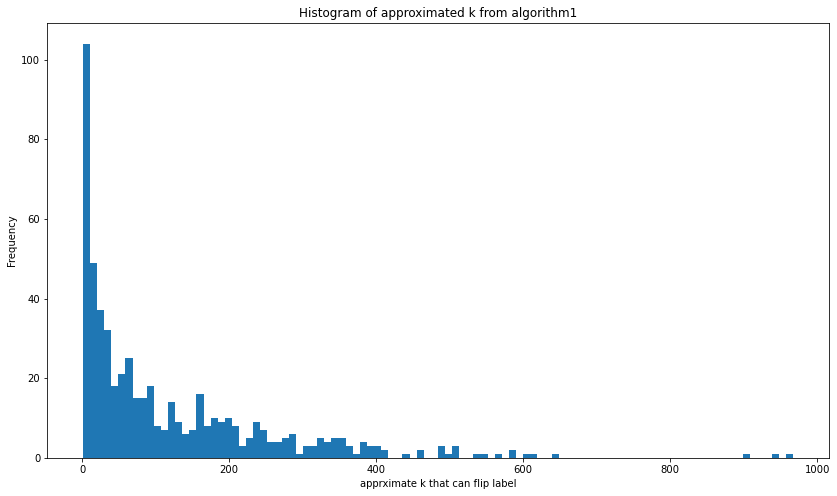

In [16]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

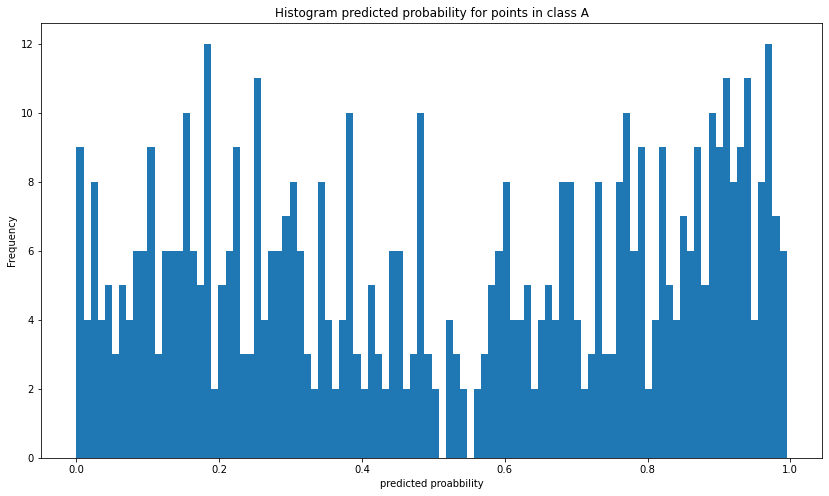

In [17]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [18]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

163

In [19]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.22047660128448116, 0.03654008085810552)

In [20]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.04574516440695013, 0.006736041869179324)